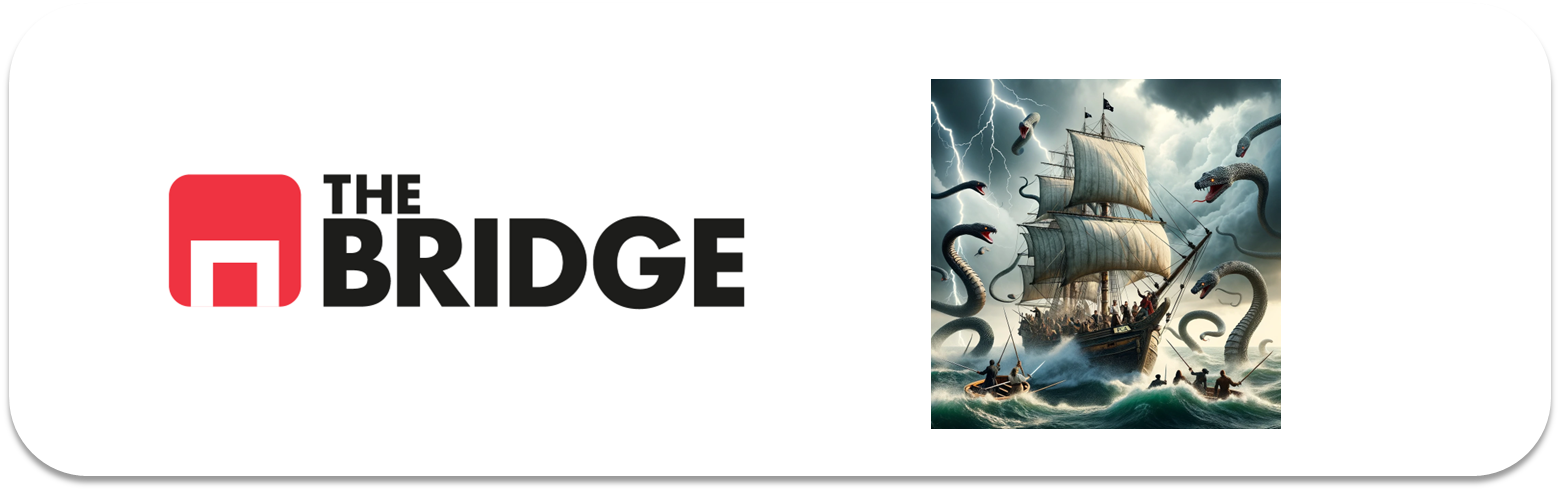

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técnicas de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [167]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, recall_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [149]:
df = pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificación sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [150]:
# Chequeo de valores nulos
df.isna().sum()

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64

In [151]:
# Eliminar filas con valores nulos
df = df.dropna()

In [152]:
# Convertir columnas a categóricas
columns_to_categorize = ["NumberOfTime30-59DaysPastDueNotWorse", 
                         "NumberOfOpenCreditLinesAndLoans",
                         "NumberOfTimes90DaysLate", 
                         "NumberRealEstateLoansOrLines", 
                         "NumberOfTime60-89DaysPastDueNotWorse", 
                         "NumberOfDependents"]

In [186]:
# Convertir las columnas a tipo numérico flotante (float) antes de categorizarlas
for col in columns_to_categorize:
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce').astype(float)

# Convertir la columna a tipo "object" antes de la asignación para evitar el FutureWarning
for col in columns_to_categorize:
    df.loc[:, col] = df[col].astype("object")

# Función para categorizar en 2-3 niveles
def categorize_feature(x):
    if pd.isna(x):  # Si hay valores nulos, los marcamos como 'Ninguna'
        return "Ninguna"
    elif x == 0:
        return "Ninguna"
    elif x <= 2:
        return "Pocos"
    else:
        return "Muchos"

# Aplicar la función de categorización correctamente
for col in columns_to_categorize:
    df.loc[:, col] = df[col].apply(lambda x: categorize_feature(x) if isinstance(x, (int, float)) else "Ninguna")

# Convertir la columna categorizada a tipo "category"
for col in columns_to_categorize:
    df.loc[:, col] = df[col].astype("category")

# Verificar la conversión
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11822 entries, 0 to NumberOfDependents
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   SeriousDlqin2yrs                      11816 non-null  object  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64 
 2   age                                   11816 non-null  object  
 3   NumberOfTime30-59DaysPastDueNotWorse  0 non-null      category
 4   DebtRatio                             11816 non-null  float64 
 5   MonthlyIncome                         11816 non-null  float64 
 6   NumberOfOpenCreditLinesAndLoans       0 non-null      category
 7   NumberOfTimes90DaysLate               0 non-null      category
 8   NumberRealEstateLoansOrLines          0 non-null      category
 9   NumberOfTime60-89DaysPastDueNotWorse  0 non-null      category
 10  NumberOfDependents                    0 non-null      category

In [154]:
# Mostrar la estructura del dataset después de la transformación
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  object 
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  object 
 7   NumberOfTimes90DaysLate               11816 non-null  object 
 8   NumberRealEstateLoansOrLines          11816 non-null  object 
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  object 
 10  NumberOfDependents                    11816 non-null  object 
dtypes: float64(3), int64

In [155]:
# Mostrar algunas filas
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,Ninguna,0.070709,5656.0,Muchos,Pocos,Ninguna,Ninguna,Ninguna
1,0,0.023413,74,Ninguna,0.209197,4870.0,Muchos,Ninguna,Pocos,Ninguna,Ninguna
2,0,0.000000,43,Ninguna,0.080784,5000.0,Pocos,Ninguna,Ninguna,Ninguna,Pocos
3,0,0.492754,44,Ninguna,0.412735,7333.0,Muchos,Ninguna,Pocos,Ninguna,Muchos
4,0,1.000000,63,Ninguna,0.000000,8333.0,Muchos,Ninguna,Ninguna,Ninguna,Pocos


In [156]:
# 1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.

# Identificar variables categóricas
cat_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Convertir variables categóricas a numéricas
df_encoded = df.copy()
for col in cat_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

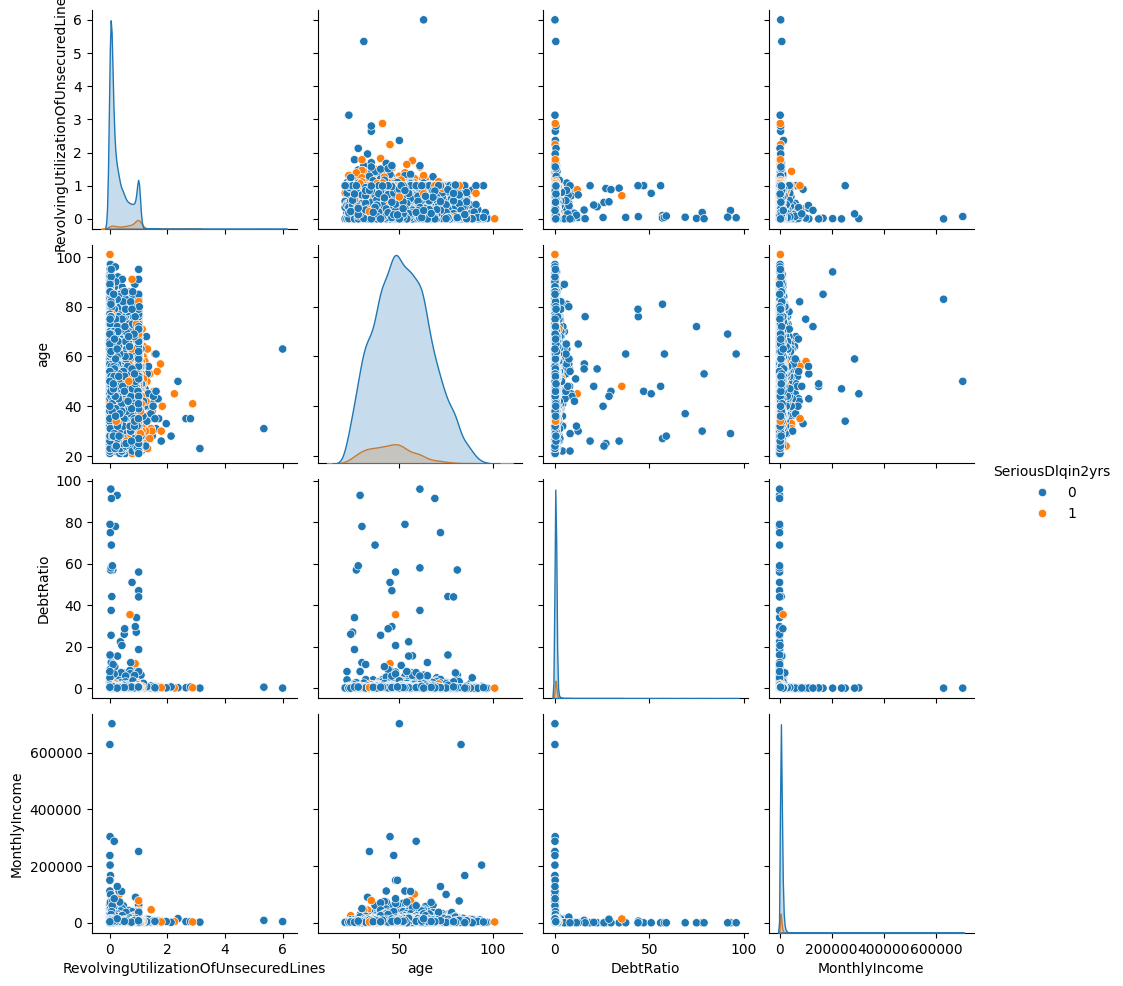

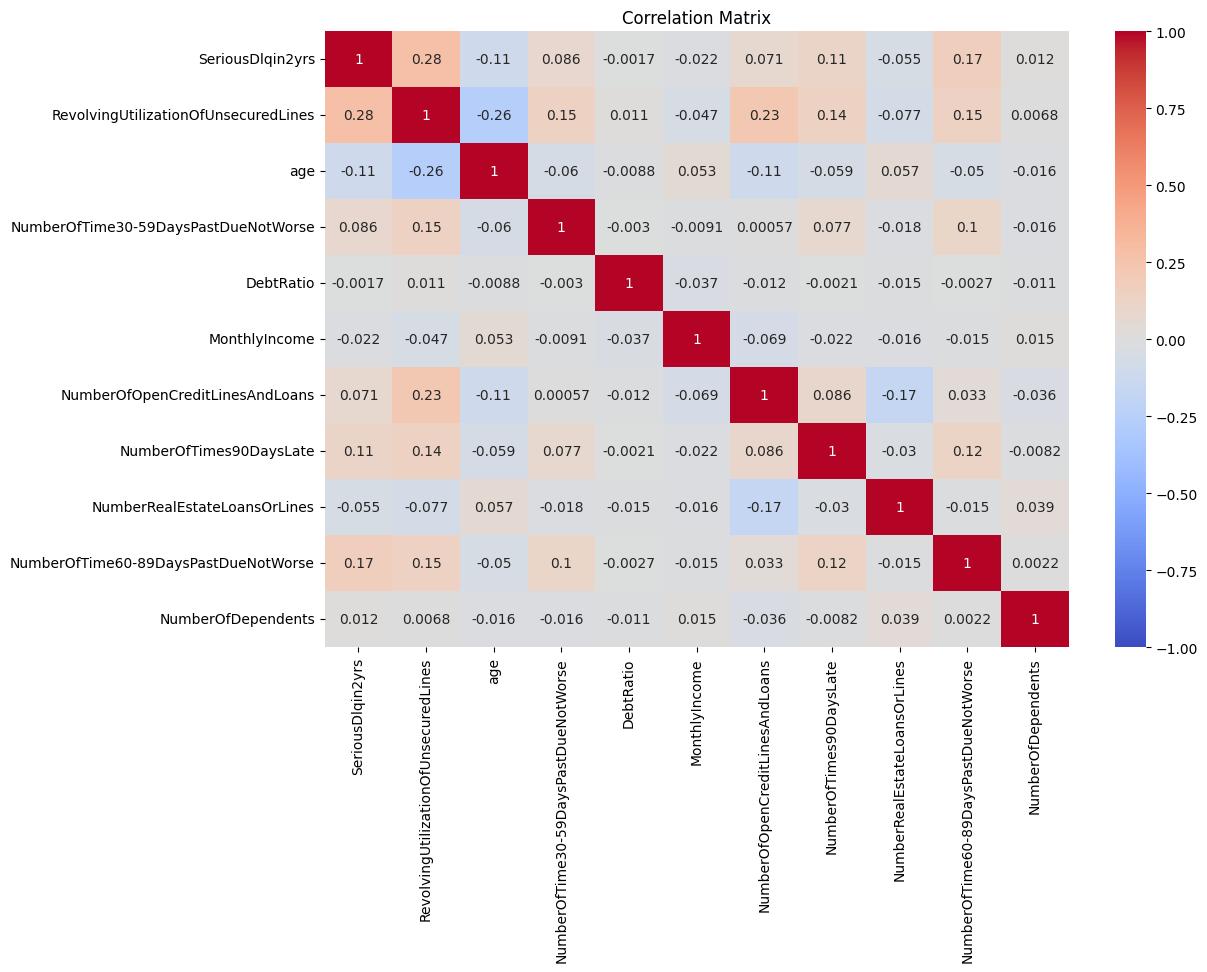

['NumberOfTime60-89DaysPastDueNotWorse',
 'RevolvingUtilizationOfUnsecuredLines',
 'NumberOfTimes90DaysLate',
 'SeriousDlqin2yrs',
 'MonthlyIncome',
 'age']

In [157]:
# Visual analysis using pairplot
sns.pairplot(df, hue='SeriousDlqin2yrs')
plt.show()

# Calcular la matriz de correlacion
correlation_matrix = df_encoded.corr()

# Plot de heatmap de la matriz de correlacion
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Filtrar features basadas en el umbral de correlación
correlation_threshold = 0.1
high_correlation_features = correlation_matrix.index[abs(correlation_matrix["SeriousDlqin2yrs"]) > correlation_threshold].tolist()

# Calcular la matriz de covarianza
covariance_matrix = df_encoded.cov()

# Filtrar features basadas en el umbral de covarianza
covariance_threshold = 0.1
high_covariance_features = covariance_matrix.index[abs(covariance_matrix["SeriousDlqin2yrs"]) > covariance_threshold].tolist()

# Combinar las features de ambas correlaciones y covarianzas
selected_features = list(set(high_correlation_features) | set(high_covariance_features))

# Mostramos las features seleccionadas
selected_features

In [158]:
# 2. Selección de features numéricas mediante SelectKBest y ANOVA, selección de features categóricas mediante Mutual Information

# Separamos features y variable target
X = df.drop(columns=['SeriousDlqin2yrs'])
y = df['SeriousDlqin2yrs']

# Identificar variables categóricas
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()
cat_features

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [159]:
# 2. Selección de features numéricas mediante SelectKBest y ANOVA, selección de features categóricas mediante Mutual Information 

# Convertir las variables categóricas a valores numéricos con LabelEncoder
X_encoded = X.copy()
for col in cat_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Aplicar SelectKBest para seleccionar las mejores características categóricas
select_k_best_cat = SelectKBest(score_func=mutual_info_classif, k=6)  # Seleccionamos 6 mejores
X_cat_selected = select_k_best_cat.fit_transform(X_encoded[cat_features], y)

# Obtener los nombres de las variables seleccionadas
selected_cat_features = X_encoded[cat_features].columns[select_k_best_cat.get_support()].tolist()

# Mostrar las mejores características seleccionadas
print("Mejores características categóricas seleccionadas:", selected_cat_features)

Mejores características categóricas seleccionadas: ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [160]:
# 3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

# Entrenar un modelo de RandomForest para la selección de características
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_encoded, y)

# Aplicar SelectFromModel correctamente
sfm = SelectFromModel(rf_model, threshold="mean", prefit=False)
sfm.fit(X_encoded, y)

# Obtener los nombres de las mejores características
selected_sfm = X_encoded.columns[sfm.get_support()].tolist()

# Mostrar las mejores características seleccionadas
print("Mejores características seleccionadas por SelectFromModel:", selected_sfm)


Mejores características seleccionadas por SelectFromModel: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']


In [161]:
# 4. Selección de las mejores features empleando RFE.

# Crear el modelo de RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Crear el selector RFE con el modelo de RandomForest
rfe_selector = RFE(estimator=rf_model, n_features_to_select=6, step=1)

# Ajustar el selector RFE a los datos
rfe_selector.fit(X_encoded, y)

# Obtener los nombres de las mejores características seleccionadas por RFE
selected_rfe_features = X_encoded.columns[rfe_selector.get_support()].tolist()

# Mostrar las mejores características seleccionadas
print("Mejores características seleccionadas por RFE:", selected_rfe_features)

Mejores características seleccionadas por RFE: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfTimes90DaysLate']


In [162]:
# 5. Selección de las mejores features empleando SFS.

# Crear el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Crear el Sequential Feature Selector con el modelo
sfs_selector = SequentialFeatureSelector(rf_model, n_features_to_select=6, direction='forward')

# Entrenar el selector
sfs_selector.fit(X_encoded, y)

# Obtener las mejores características seleccionadas por SFS
selected_sfs_features = X_encoded.columns[sfs_selector.get_support()].tolist()

# Mostrar las mejores características seleccionadas
print("Mejores características seleccionadas por SFS:", selected_sfs_features)

Mejores características seleccionadas por SFS: ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


In [163]:
# 6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

# Combina todas las características seleccionadas
all_selected_features = selected_features + selected_cat_features + selected_sfm + selected_rfe_features + selected_sfs_features

# Cuenta la frecuncia de cada característica
feature_counter = Counter(all_selected_features)

# Selecciona características que aparecen en al menos 3 de los 5 métodos
final_selected_features = [feature for feature, count in feature_counter.items() if count >= 3]

# Mostrar las mejores características seleccionadas
print("Mejores características finales seleccionadas por hard-voting:", final_selected_features)

Mejores características finales seleccionadas por hard-voting: ['NumberOfTime60-89DaysPastDueNotWorse', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate', 'MonthlyIncome', 'age', 'NumberOfTime30-59DaysPastDueNotWorse']


In [ ]:
# 3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente.
# Es decir tendrás 18 (6*3) medidas
# (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

# Definir los modelos a comparar
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

# Definir las listas de características seleccionadas
feature_sets = {
    'Selected_Features': selected_features,
    'Selected_Cat_Features': selected_cat_features,
    'Selected_SFM': selected_sfm,
    'Selected_RFE_Features': selected_rfe_features,
    'Selected_SFS_Features': selected_sfs_features,
    'Final_Selected_Features': final_selected_features
}

# Definir el scorer
scorer = make_scorer(recall_score)

# Evaluar cada modelo con cada conjunto de características
results = {}
for model_name, model in models.items():
    model_results = {}
    for feature_set_name, feature_set in feature_sets.items():
        
        # Filtrar solo las columnas que existen en X_encoded para evitar errores
        valid_features = list(set(feature_set).intersection(X_encoded.columns))
        
        if not valid_features:
            print(f"Advertencia: No hay características válidas en '{feature_set_name}' para el modelo '{model_name}'.")
            continue  # Saltar este conjunto de características si está vacío

        X_subset = X_encoded[valid_features]  # Tomar solo columnas válidas
        scores = cross_val_score(model, X_subset, y, cv=StratifiedKFold(n_splits=5), scoring=scorer)
        model_results[feature_set_name] = scores.mean()
    
    results[model_name] = model_results

# Mostrar los resultados
results


{'RandomForest': {'Selected_Features': 0.20120481927710845,
  'Selected_Cat_Features': 0.15783132530120483,
  'Selected_SFM': 0.07349397590361446,
  'Selected_RFE_Features': 0.18433734939759033,
  'Selected_SFS_Features': 0.15783132530120483,
  'Final_Selected_Features': 0.19759036144578315},
 'KNeighbors': {'Selected_Features': 0.014457831325301203,
  'Selected_Cat_Features': 0.15421686746987953,
  'Selected_SFM': 0.012048192771084338,
  'Selected_RFE_Features': 0.014457831325301203,
  'Selected_SFS_Features': 0.15421686746987953,
  'Final_Selected_Features': 0.01566265060240964},
 'LogisticRegression': {'Selected_Features': 0.0,
  'Selected_Cat_Features': 0.014457831325301203,
  'Selected_SFM': 0.0,
  'Selected_RFE_Features': 0.0,
  'Selected_SFS_Features': 0.014457831325301203,
  'Final_Selected_Features': 0.0}}

In [168]:
# 4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.

# Identificar el mejor modelo y conjunto de características
best_model_name = 'RandomForest'
best_feature_set_name = 'Selected_Features'
best_features = feature_sets[best_feature_set_name]

# Filtrar solo las columnas que existen en X_encoded para evitar errores
valid_features = list(set(best_features).intersection(X_encoded.columns))
X_best = X_encoded[valid_features]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42, stratify=y)

# Definir el modelo y la rejilla de hiperparámetros
model = models[best_model_name]
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring=scorer, n_jobs=-1)

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo contra el conjunto de prueba
y_pred = best_model.predict(X_test)
test_recall = recall_score(y_test, y_pred)

print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Recall en el conjunto de prueba: {test_recall}")

Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Recall en el conjunto de prueba: 0.1927710843373494


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.

In [170]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Seleccionar el número de componentes en función de la varianza explicada
varianza_explicada = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(varianza_explicada >= 0.95) + 1  # Seleccionar componentes que expliquen al menos el 95% de la varianza

# Crear el nuevo dataset con el número seleccionado de componentes
X_pca_selected = X_pca[:, :num_components]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_selected, y, test_size=0.2, random_state=42, stratify=y)

# Definir el modelo ganador
best_model_pca = RandomForestClassifier(random_state=42, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200)

# Entrenar el modelo con el nuevo conjunto de datos
best_model_pca.fit(X_train_pca, y_train_pca)

# Evaluar el modelo contra el conjunto de prueba
y_pred_pca = best_model_pca.predict(X_test_pca)
test_recall_pca = recall_score(y_test_pca, y_pred_pca)

print(f"Número de componentes seleccionados: {num_components}")
print(f"Recall en el conjunto de prueba con PCA: {test_recall_pca}")

Número de componentes seleccionados: 10
Recall en el conjunto de prueba con PCA: 0.21084337349397592
